# 🛒 Walmart Sales Forecasting - EDA

## 📌 Business Problem

Walmart, one of the largest retail chains in the world, operates 45 stores across various regions. Each store comprises multiple departments, and this project focuses on forecasting **weekly sales at the department level** for each store.

The challenge includes accounting for **seasonal effects**, **regional economics**, and **promotional markdowns**, particularly around major U.S. holidays like the **Super Bowl**, **Labor Day**, **Thanksgiving**, and **Christmas**. These holidays are known to heavily influence sales patterns, and the weeks surrounding them are **weighted 5x higher** in the model evaluation.



---

## 📂 Datasets Description
| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| `Store`        | Unique identifier for each store                                            |
| `Dept`         | Department number within the store                                          |
| `Date`         | Week of the sale (`YYYY-MM-DD` format)                                      |
| `IsHoliday`    | Whether the week includes a holiday (True/False)                            |
| `Weekly_Sales` | Cleaned weekly sales figures                                                |
| `Holiday_Flag` | Holiday indicator  (0 or 1)                                                 |  
| `Temperature`  | Average temperature during the week                                         |
| `Fuel_Price`   | Fuel price in the store's region                                            |
| `CPI`          | Consumer Price Index                                                        |
| `Unemployment` | Unemployment rate                                                           |
| `MarkDown1-5`  | Promotional markdown values                                                 |
| `Type`         | Store type (A, B, or C)                                                     |
| `Size`         | Size of the store in square feet                                            |


---

## 🗓️ Key Holiday Weeks

- **Super Bowl**: 12-Feb-2010, 11-Feb-2011, 10-Feb-2012, 8-Feb-2013  
- **Labor Day**: 10-Sep-2010, 9-Sep-2011, 7-Sep-2012, 6-Sep-2013  
- **Thanksgiving**: 26-Nov-2010, 25-Nov-2011, 23-Nov-2012, 29-Nov-2013  
- **Christmas**: 31-Dec-2010, 30-Dec-2011, 28-Dec-2012, 27-Dec-2013  

---







# 🔍 Data Overview & Exploration

In [5]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset=pd.read_csv('../walmart.csv')

In [7]:
dataset.shape

(421570, 17)

In [8]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Weekly_Sales', 'Holiday_Flag',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'Size'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  bool   
 4   Weekly_Sales  421570 non-null  float64
 5   Holiday_Flag  421570 non-null  int64  
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   CPI           421570 non-null  float64
 9   Unemployment  421570 non-null  float64
 10  MarkDown1     150681 non-null  float64
 11  MarkDown2     111248 non-null  float64
 12  MarkDown3     137091 non-null  float64
 13  MarkDown4     134967 non-null  float64
 14  MarkDown5     151432 non-null  float64
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(4), object(2)
mem

*📝 *Conclusion: There is no problem with Data Types found in dataset except for **Date Column** we can change it to **Date Data type** and Engineer time-based features (e.g., day of the week, month, seasonality, promotional periods).*

In [10]:
dataset.duplicated().sum() #checking for duplicates

np.int64(0)

In [11]:
dataset.isnull().sum() #checking for null values

Store                0
Dept                 0
Date                 0
IsHoliday            0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
Type                 0
Size                 0
dtype: int64

In [12]:
dataset.describe(include=np.number)#Getting the summary of numerical columns

,Store,Dept,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size
count,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000
mean,22.200546,44.260317,1.095707e+06,0.070358,60.090059,3.361027,171.201947,7.960289,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,136727.915739
std,12.785297,30.492054,5.613908e+05,0.255750,18.447931,0.458515,39.159276,1.863296,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,60980.583328
min,1.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.270000,-265.760000,-29.100000,0.220000,135.160000,34875.000000
25%,11.000000,18.000000,6.066715e+05,0.000000,46.680000,2.933000,132.022667,6.891000,2240.270000,41.600000,5.080000,504.220000,1878.440000,93638.000000
50%,22.000000,37.000000,1.010326e+06,0.000000,62.090000,3.452000,182.318780,7.866000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,140167.000000
75%,33.000000,74.000000,1.463502e+06,0.000000,74.280000,3.738000,212.416993,8.572000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,202505.000000
max,45.000000,99.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,219622.000000


In [13]:
dataset.describe(include='object')#Getting the summary of categorical columns

,Date,Type
count,421570,421570
unique,143,3
top,2011-12-23,A
freq,3027,215478


In [14]:
#getting the number of unique values in Store Column
dataset['Store'].nunique()

45

In [15]:
#getting the number of unique values in Department Column
dataset['Dept'].nunique()

81

In [16]:
#getting the number of Holiday weeks
dataset['Holiday_Flag'].value_counts()

Holiday_Flag
0    391909
1     29661
Name: count, dtype: int64

📝 *Conclusion: as '0' indicates no Holiday ,'1' indicates Holiday so number of holidays is 29,661*

In [17]:
print(f"the maximum value of the Date column is {dataset['Date'].max()} and the minimum value is {dataset['Date'].min()}")

the maximum value of the Date column is 2012-10-26 and the minimum value is 2010-02-05


# 📊 Data Overview and Exploration Summary

The `walmart.csv` dataset provides a comprehensive view of Walmart's weekly sales activity across various stores and departments.

## 🧾 Findings

- **Time Range**: 2010-02-05 to 2012-10-26  
- **Total Records**: 421,570  
- **Unique Stores**: 45  
- **Unique Departments**: 81  
- **Holiday Weeks**: 29,661  

## ⚠️ Missing Values

The following columns contain missing values:

- **MarkDown1**: 270,889 missing  
- **MarkDown2**: 310,322 missing  
- **MarkDown3**: 284,479 missing  
- **MarkDown4**: 286,603 missing  
- **MarkDown5**: 270,138 missing  

## 🧠 Key Columns and Purpose

- **Sales Metrics**: `Weekly_Sales`, used for forecasting and trend analysis.  
- **Holidays**: `IsHoliday`, `Holiday_Flag` help model holiday-related effects.  
- **Economic Indicators**: `CPI`, `Unemployment`, `Fuel_Price`, and `Temperature`.  
- **Promotions**: `MarkDown1` to `MarkDown5` represent various types of promotional markdowns.  
- **Store Info**: `Type`, `Size` describe the structure and scale of stores.  

## 🔍 Use Cases

- **Sales Forecasting**  
- **Holiday Sales Impact Analysis**  
- **Effectiveness of Promotions**  
- **Comparative Store Performance**


---

# 🔧 Feature Extraction

In [18]:
#converting the date column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])
#checking the data types of the columns
dataset.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
Type                    object
Size                     int64
dtype: object

In [19]:
#Engineering Time-Related Features
dataset["DayOfWeek"] = dataset["Date"].dt.day_name()
dataset["IsWeekend"] = dataset["DayOfWeek"].isin([5, 6])       # Saturday or Sunday
dataset["Month"] = dataset["Date"].dt.month
dataset["Year"] = dataset["Date"].dt.year
dataset["WeekOfYear"] = dataset["Date"].dt.isocalendar().week
dataset["Quarter"] = dataset["Date"].dt.quarter

# Define season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

dataset["Season"] = dataset["Month"].apply(get_season)

promo_dates = [
    "2010-02-12", "2011-02-11", "2012-02-10", "2013-02-08",  # Super Bowl
    "2010-09-10", "2011-09-09", "2012-09-07", "2013-09-06",  # Labor Day
    "2010-11-26", "2011-11-25", "2012-11-23", "2013-11-29",  # Thanksgiving
    "2010-12-31", "2011-12-30", "2012-12-28", "2013-12-27"   # Christmas
]

# Convert promo_dates to datetime
promo_dates = pd.to_datetime(promo_dates)

# Flag promotional weeks
dataset["IsPromoWeek"] = dataset["Date"].isin(promo_dates)


In [20]:
dataset.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,...,Type,Size,DayOfWeek,IsWeekend,Month,Year,WeekOfYear,Quarter,Season,IsPromoWeek
0,1,1,2010-02-05,False,1643690.90,0,42.31,2.572,211.096358,8.106,...,A,151315,Friday,False,2,2010,5,1,Winter,False
1,1,1,2010-02-12,True,1641957.44,1,38.51,2.548,211.242170,8.106,...,A,151315,Friday,False,2,2010,6,1,Winter,True
2,1,1,2010-02-19,False,1611968.17,0,39.93,2.514,211.289143,8.106,...,A,151315,Friday,False,2,2010,7,1,Winter,False
3,1,1,2010-02-26,False,1409727.59,0,46.63,2.561,211.319643,8.106,...,A,151315,Friday,False,2,2010,8,1,Winter,False
4,1,1,2010-03-05,False,1554806.68,0,46.50,2.625,211.350143,8.106,...,A,151315,Friday,False,3,2010,9,1,Spring,False


---

# 🔗 Understanding Correlation Between Columns

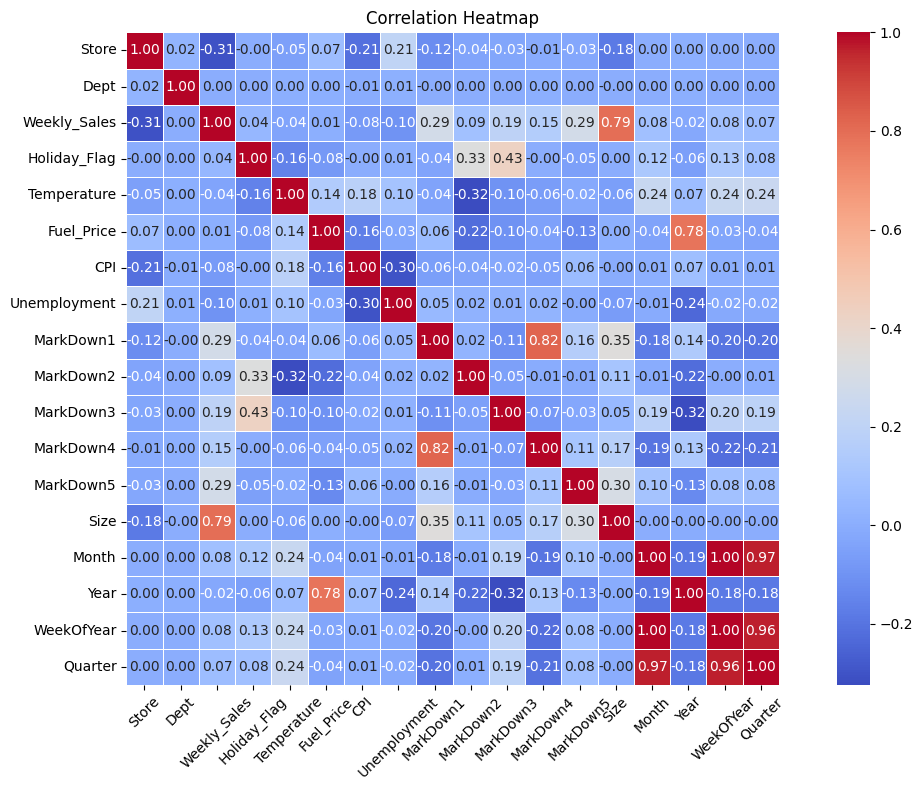

In [21]:
numeric_df = dataset.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 🔍 Correlation Heatmap Summary

The correlation heatmap provides insight into the relationships between numeric features in the dataset:

#### 📈 Key Observations:
- **Store Size** shows a **strong positive correlation** with `Weekly_Sales` (`r = 0.79`), suggesting larger stores tend to have higher sales.
- Among markdown features:
  - `MarkDown3` has the **highest correlation** with `Weekly_Sales` (`r = 0.43`)
  - `MarkDown2` and `MarkDown1` also show moderate correlation (`r = 0.33` and `r = 0.29`, respectively)
- `MarkDown1` and `MarkDown4` are **highly correlated** with each other (`r = 0.82`), indicating potential redundancy.
- Temporal features like `Month`, `Quarter`, and `WeekOfYear` show **low correlation** with sales, but may still be useful for capturing trends and seasonality.
- Economic indicators (`Fuel_Price`, `CPI`, `Unemployment`) have **weak or negative correlations** with sales.

#### ✅ Insights:
- Promotions (`MarkDown1–5`) appear relevant, particularly `MarkDown3`.
- Due to high inter-correlation between markdowns, we may consider:
  - Creating a new feature like `TotalMarkDown` (sum of all markdowns), or
  - Applying dimensionality reduction (e.g., PCA) to compress these into fewer features.




---

# 🛠️ Handling Missing Values

In [22]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

for col in markdown_cols:
    dataset[col] = dataset.apply(
        lambda row: 0 if pd.isna(row[col]) and not row['IsPromoWeek'] else row[col],
        axis=1
    )

# Check remaining missing values
print(dataset[markdown_cols].isnull().sum())

MarkDown1    17719
MarkDown2    18939
MarkDown3    18205
MarkDown4    18691
MarkDown5    17670
dtype: int64


In [23]:
# Sort to ensure proper order for filling
dataset.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

for col in markdown_cols:
    dataset[col] = dataset.groupby(['Store', 'Dept'])[col].transform(
        lambda group: group.where(~dataset['IsPromoWeek']).ffill()
    )
# Count remaining NaNs in MarkDown columns
remaining_nans = dataset[markdown_cols].isnull().sum()
print("Remaining missing values in MarkDown columns:")
print(remaining_nans)

Remaining missing values in MarkDown columns:
MarkDown1    89
MarkDown2    89
MarkDown3    89
MarkDown4    89
MarkDown5    89
dtype: int64


In [24]:
#Handling the remaining null values
for col in markdown_cols:
    dataset[col] = dataset.groupby(['Store', 'Dept'])[col].transform(
        lambda group: group.ffill().bfill()
    )

# 🔍 Check if any missing values remain
print("Remaining missing values in MarkDown columns:")
print(dataset[markdown_cols].isna().sum())

Remaining missing values in MarkDown columns:
MarkDown1    5
MarkDown2    5
MarkDown3    5
MarkDown4    5
MarkDown5    5
dtype: int64


In [25]:
dataset[markdown_cols] = dataset[markdown_cols].fillna(0)
# 🔍 Check if any missing values remain
print("Remaining missing values in MarkDown columns:")
print(dataset[markdown_cols].isna().sum())


Remaining missing values in MarkDown columns:
MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


In [26]:
dataset.isnull().sum()#checking for null values again

Store           0
Dept            0
Date            0
IsHoliday       0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Type            0
Size            0
DayOfWeek       0
IsWeekend       0
Month           0
Year            0
WeekOfYear      0
Quarter         0
Season          0
IsPromoWeek     0
dtype: int64

### 🧼 Summary of Handling Missing Values in `MarkDown` Columns

The `MarkDown1–5` columns represent promotional discounts at different times. These columns contain a large number of missing values, but it's important to interpret these carefully before treating them.

#### 📌 Key Assumption
Missing values in `MarkDown` columns do **not always** mean data loss. Instead:
- A missing value may simply indicate **no promotion** was running that week.
- However, if a promotion spans multiple weeks and data is missing in the middle of it, we shouldn't blindly fill with `0`.



### ✅ Step-by-Step Strategy

1. **Sort the data** by `Store`, `Dept`, and `Date` to ensure temporal consistency.
2. **Identify promotional weeks** using a custom feature (`IsPromoWeek`) based on whether any `MarkDown` column has a value.
3. **Forward Fill (ffill)** missing values:
   - Applied **within each Store–Dept group** to keep the logic localized.
   - Only filled **during promotional periods**, assuming the promo could last multiple weeks.
4. **Remaining NaNs:** After forward filling, a very small number of missing values remain (5 per column). These are likely outliers or non-promo edge cases.
5. **Final Treatment:** Choose between:
   - Filling the remaining NaNs with `0` (assumes no promo).



### 🔍 Outcome: There is no remains of any missing values 


---

# 🔎Outliers Detection and Handling

In [27]:
# As there was negative values in the markdown columns, we will check how many negative values are there in each column
for col in markdown_cols:
    print(f"{col} - Negative values: {(dataset[col] < 0).sum()}")


MarkDown1 - Negative values: 0
MarkDown2 - Negative values: 1039
MarkDown3 - Negative values: 257
MarkDown4 - Negative values: 0
MarkDown5 - Negative values: 0


### 📝Conclusion:Since the number of negative values is:
- Reasonably small (especially in MarkDown3),
- Likely represents invalid values (discounts shouldn’t be negative)
- We can safely replace them with 0, meaning no discount was applied

In [28]:
# Only fix MarkDown2 and MarkDown3
dataset['MarkDown2'] = dataset['MarkDown2'].clip(lower=0)
dataset['MarkDown3'] = dataset['MarkDown3'].clip(lower=0)

In [29]:
for col in markdown_cols:
    neg_count = (dataset[col] < 0).sum()
    print(f"{col}: Negative values = {neg_count}")


MarkDown1: Negative values = 0
MarkDown2: Negative values = 0
MarkDown3: Negative values = 0
MarkDown4: Negative values = 0
MarkDown5: Negative values = 0


In [30]:
for col in ['Unemployment', 'CPI', 'Fuel_Price', 'Temperature', 'Size','Weekly_Sales']:
    neg_count = (dataset[col] < 0).sum()
    print(f"{col}: Negative values = {neg_count}")

Unemployment: Negative values = 0
CPI: Negative values = 0
Fuel_Price: Negative values = 0
Temperature: Negative values = 69
Size: Negative values = 0
Weekly_Sales: Negative values = 0


In [31]:
dataset.describe(include=np.number)

,Store,Dept,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Month,Year,WeekOfYear,Quarter
count,421570.000000,421570.000000,4.215700e+05,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000
mean,22.200546,44.260317,1.095707e+06,0.070358,60.090059,3.361027,171.201947,7.960289,2845.583623,575.582815,68.825324,1258.856432,1699.866183,136727.915739,6.449510,2010.968591,25.826762,2.482767
std,12.785297,30.492054,5.613908e+05,0.255750,18.447931,0.458515,39.159276,1.863296,7042.783817,2896.424322,619.209680,4809.903699,4255.717913,60980.583328,3.243217,0.796876,14.151887,1.071341
min,1.000000,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,0.000000,0.000000,0.000000,0.000000,34875.000000,1.000000,2010.000000,1.0,1.000000
25%,11.000000,18.000000,6.066715e+05,0.000000,46.680000,2.933000,132.022667,6.891000,0.000000,0.000000,0.000000,0.000000,0.000000,93638.000000,4.000000,2010.000000,14.0,2.000000
50%,22.000000,37.000000,1.010326e+06,0.000000,62.090000,3.452000,182.318780,7.866000,0.000000,0.000000,0.000000,0.000000,0.000000,140167.000000,6.000000,2011.000000,26.0,2.000000
75%,33.000000,74.000000,1.463502e+06,0.000000,74.280000,3.738000,212.416993,8.572000,2836.480000,1.980000,4.530000,442.390000,2257.530000,202505.000000,9.000000,2012.000000,38.0,3.000000
max,45.000000,99.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,88646.760000,45971.430000,25959.980000,67474.850000,108519.280000,219622.000000,12.000000,2012.000000,52.0,4.000000


In [32]:
def check_outliers(data, col, q1=0.25, q3=0.75):
    Q1 = data[col].quantile(q1)
    Q3 = data[col].quantile(q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index.tolist()
    return outlier_indices


In [33]:
for col in ['Unemployment', 'CPI', 'Fuel_Price', 'Temperature', 'Size','Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    outlier_indices = check_outliers(dataset, col)
    print(f"Outliers in {col}: {len(outlier_indices)}")


Outliers in Unemployment: 32114
Outliers in CPI: 0
Outliers in Fuel_Price: 0
Outliers in Temperature: 69
Outliers in Size: 0
Outliers in Weekly_Sales: 2179
Outliers in MarkDown1: 56102
Outliers in MarkDown2: 102274
Outliers in MarkDown3: 84986
Outliers in MarkDown4: 78273
Outliers in MarkDown5: 37911


# Outliers Before handling

# 📊Histogram Distribution

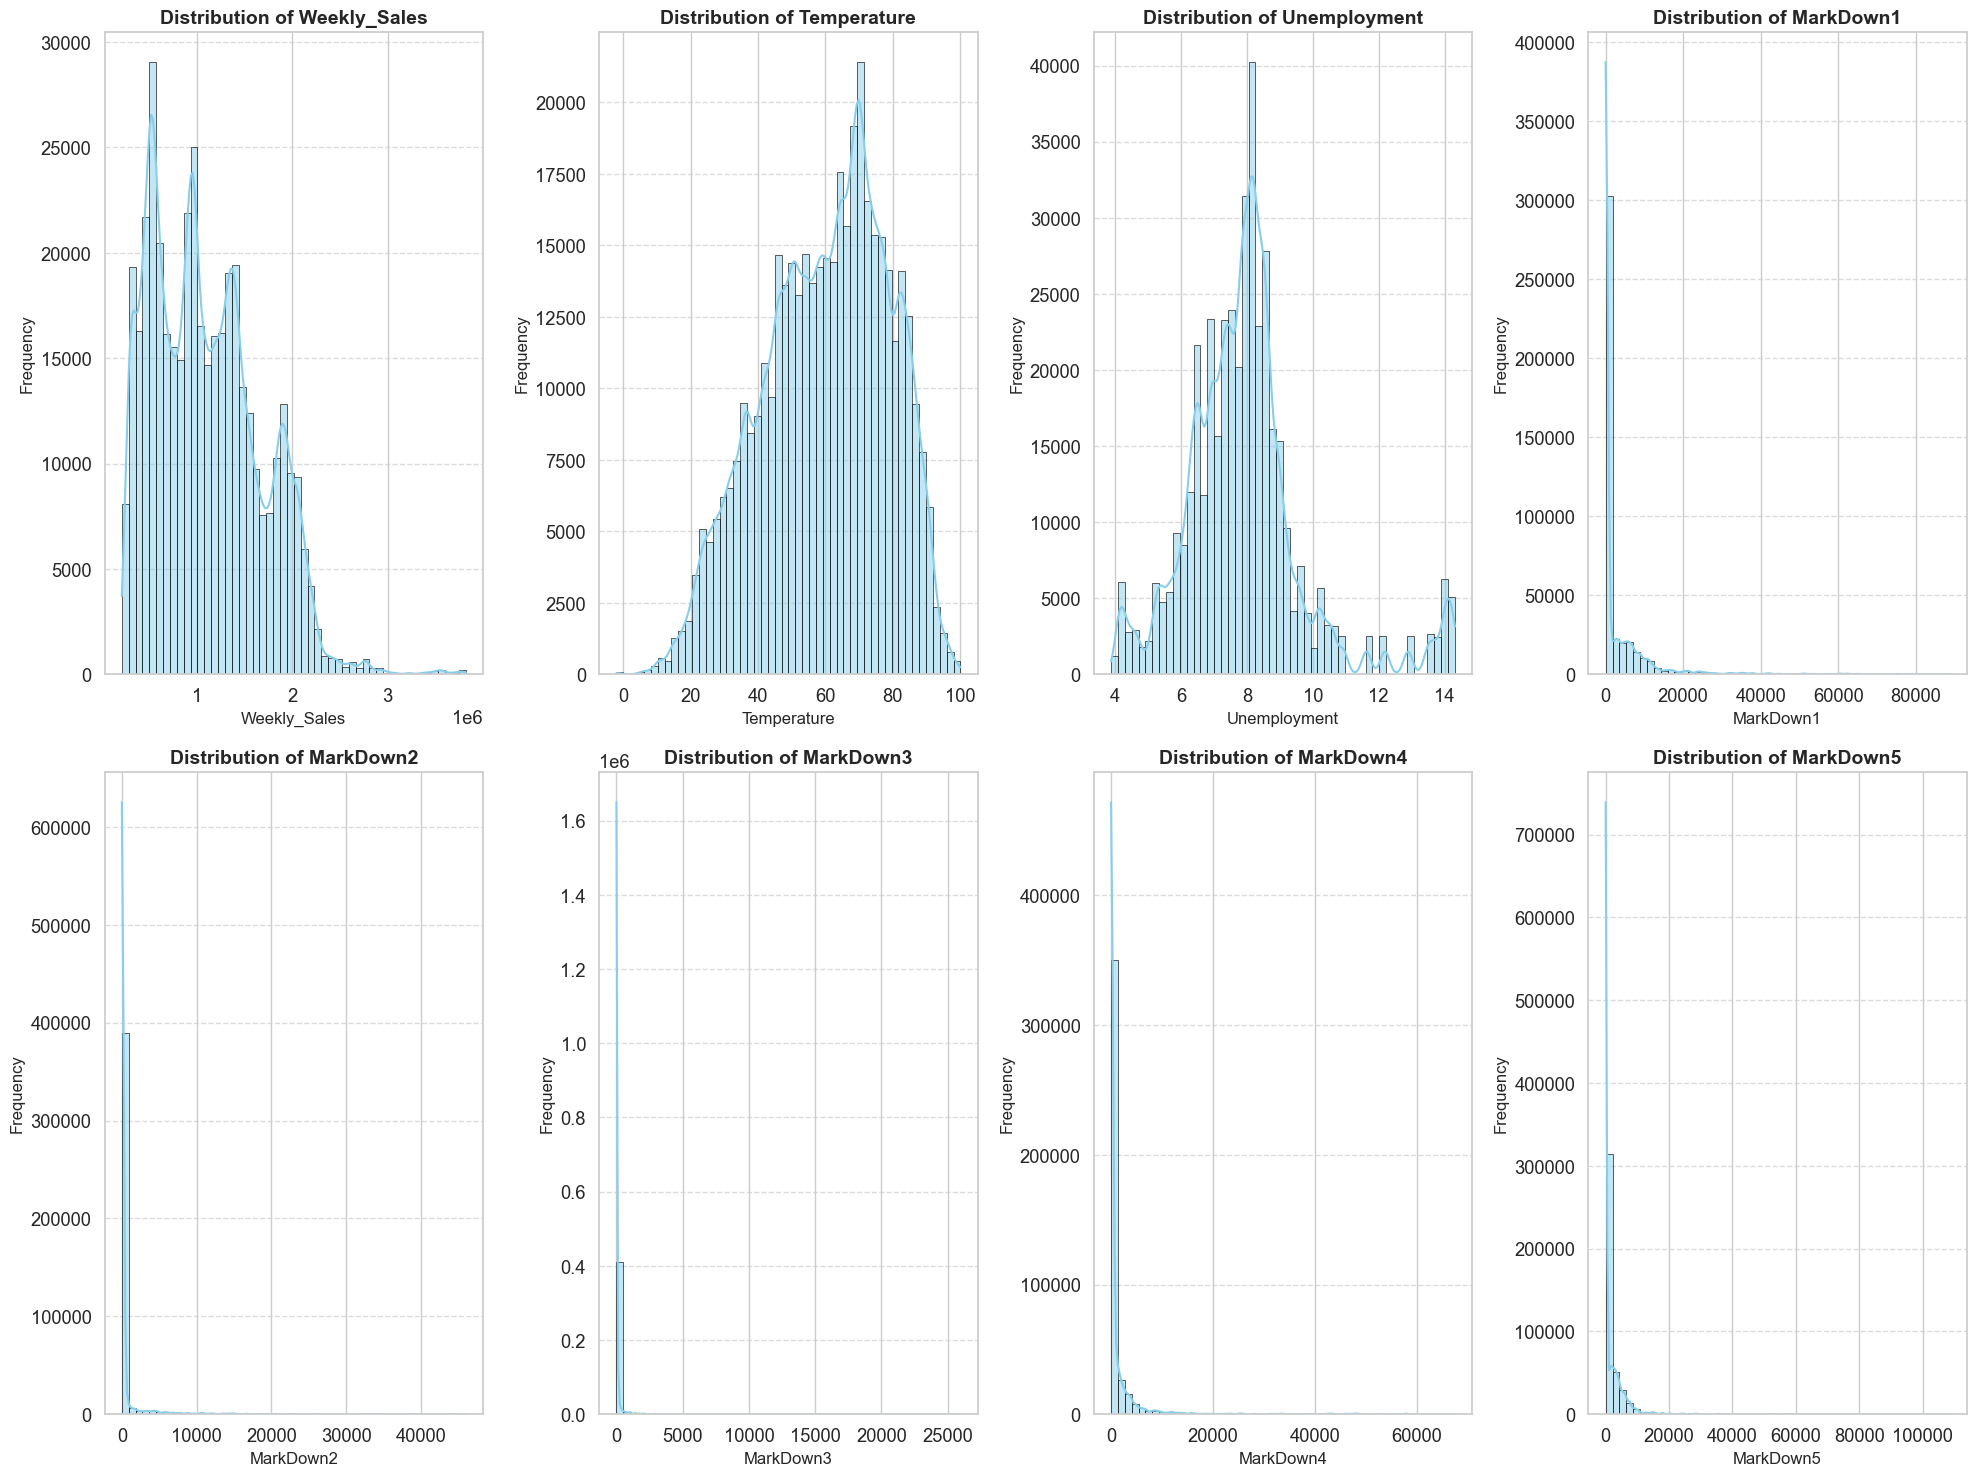

In [35]:

# Set the style for the plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Define the columns to plot
columns = ['Weekly_Sales', 'Temperature', 'Unemployment',
           'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Function to plot histograms in a 4x4 matrix layout
def plot_histograms_matrix(df, cols, bins=50):
    num_cols = 4
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cols):
        sns.histplot(df[col].dropna(), bins=bins, kde=True, color="skyblue", edgecolor="black", ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function to plot histograms
plot_histograms_matrix(dataset, columns)

# 🧰BoxPlot

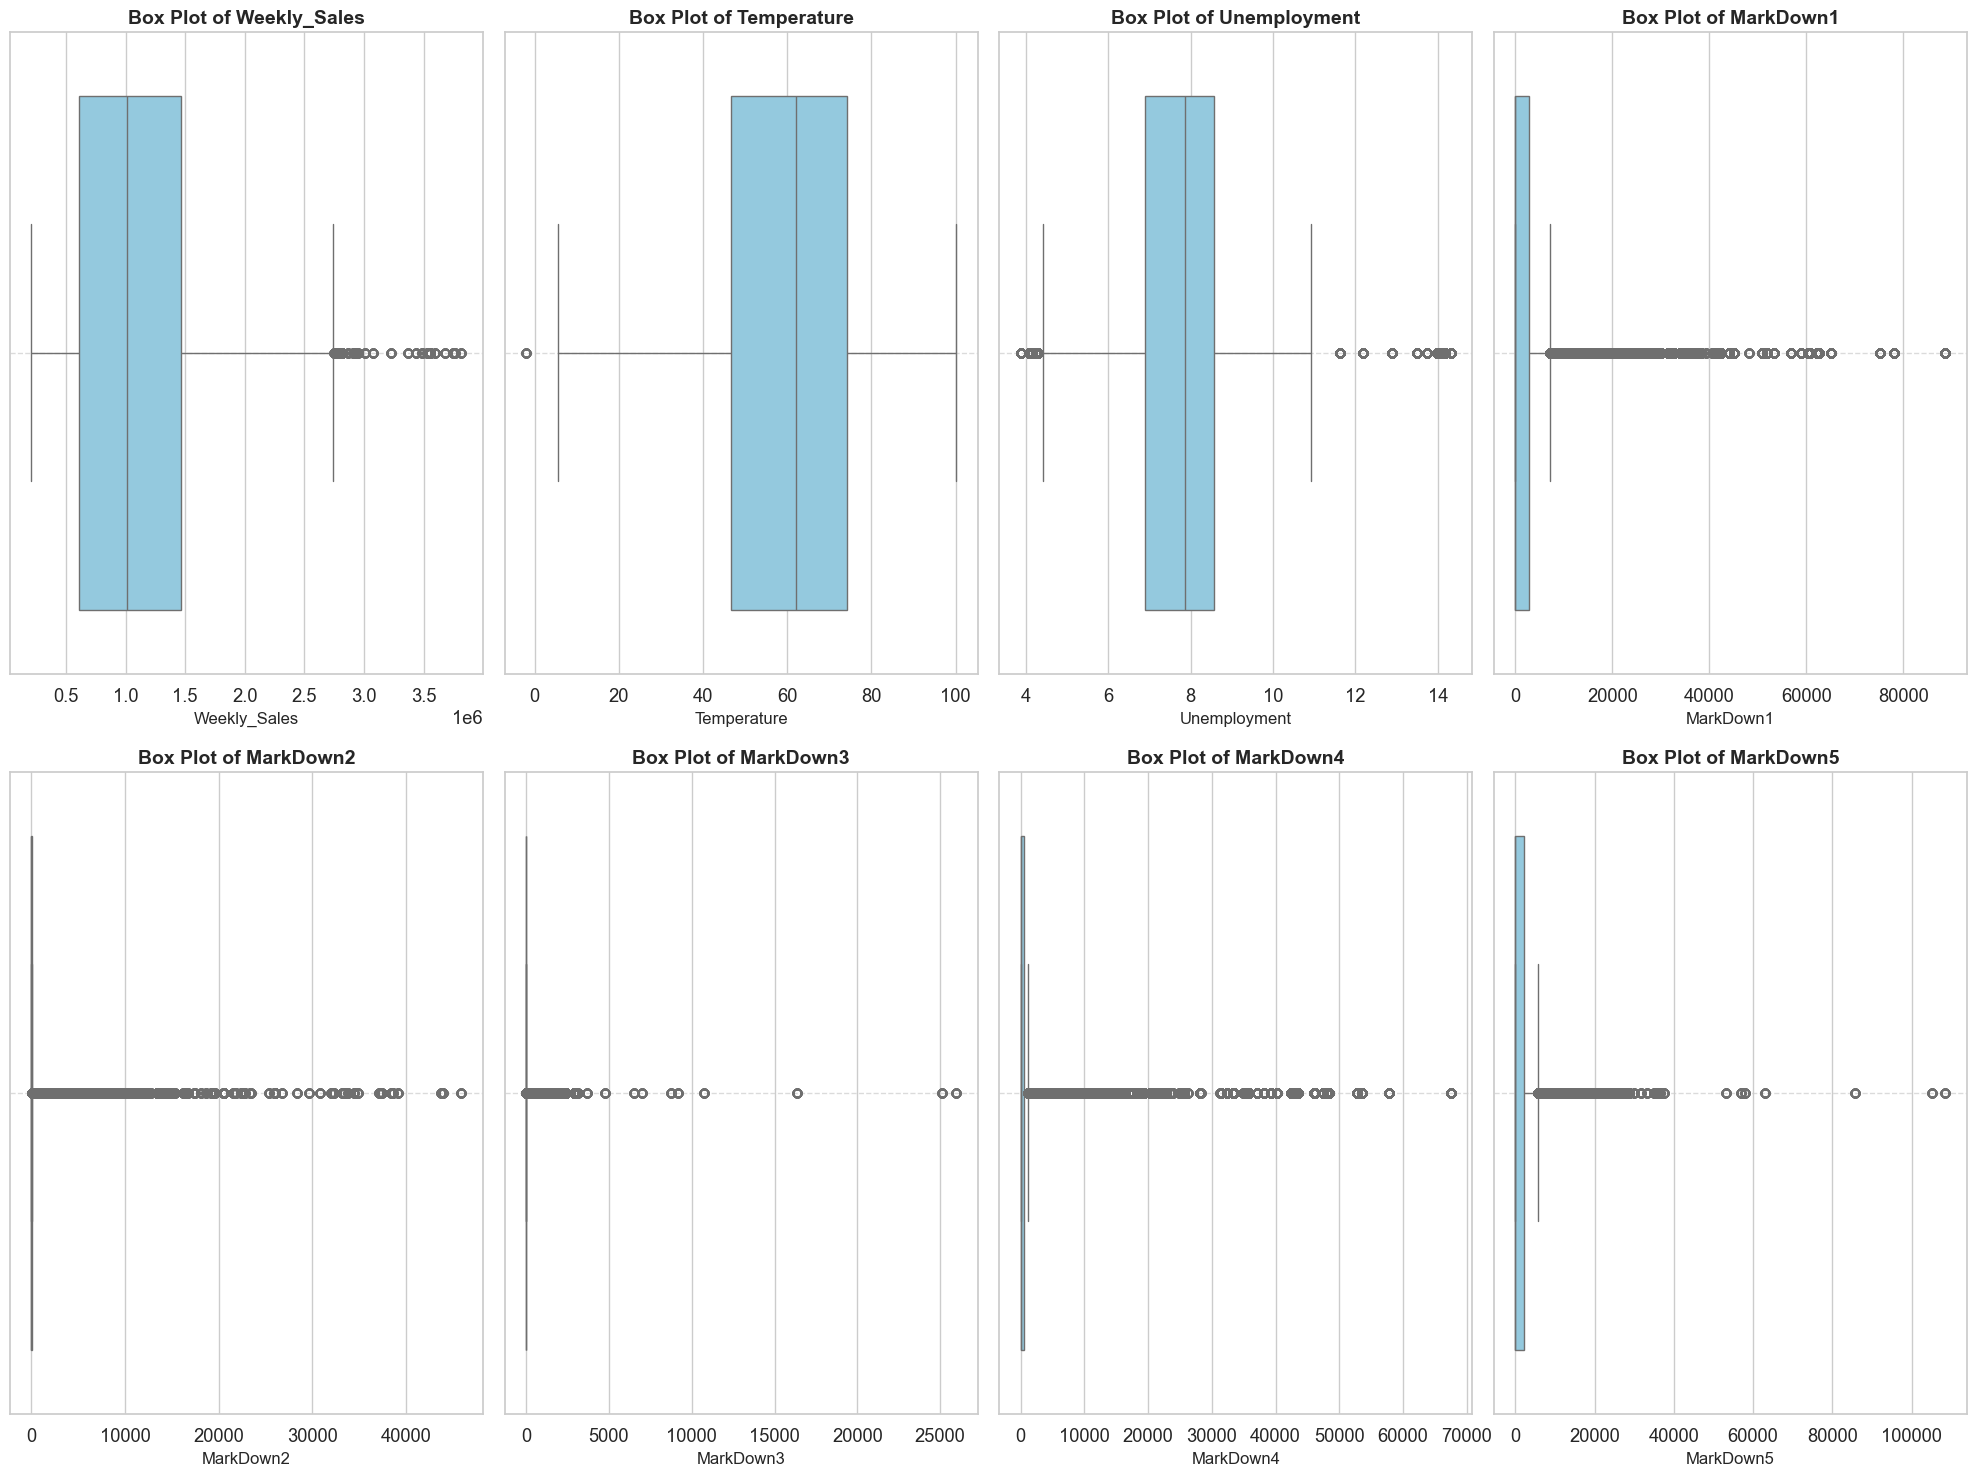

In [36]:
# Set the style for the plots
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Define the columns to plot
columns = ['Weekly_Sales', 'Temperature', 'Unemployment',
           'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Function to plot box plots in a 4x4 matrix layout
def plot_boxplots_matrix(df, cols):
    num_cols = 4
    num_rows = (len(cols) + num_cols - 1) // num_cols  # Calculate the number of rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cols):
        sns.boxplot(data=df, x=col, color="skyblue", ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function to plot box plots
plot_boxplots_matrix(dataset, columns)


In [37]:
def cap_outliers(data, col, upper_percentile=0.99):
    upper_cap = data[col].quantile(upper_percentile)
    data[col] = data[col].apply(lambda x: min(x, upper_cap))
    return data

def log_transform(data, col):
    data[col] = np.log1p(data[col])  # log(1 + x) to handle zeros
    return data

In [38]:
data = cap_outliers(dataset, 'Weekly_Sales', 0.99)
data = log_transform(dataset, 'MarkDown2')
data = log_transform(dataset, 'MarkDown3')
data = log_transform(dataset, 'MarkDown4')
data = log_transform(dataset, 'MarkDown5')


# Oultiers After Handling

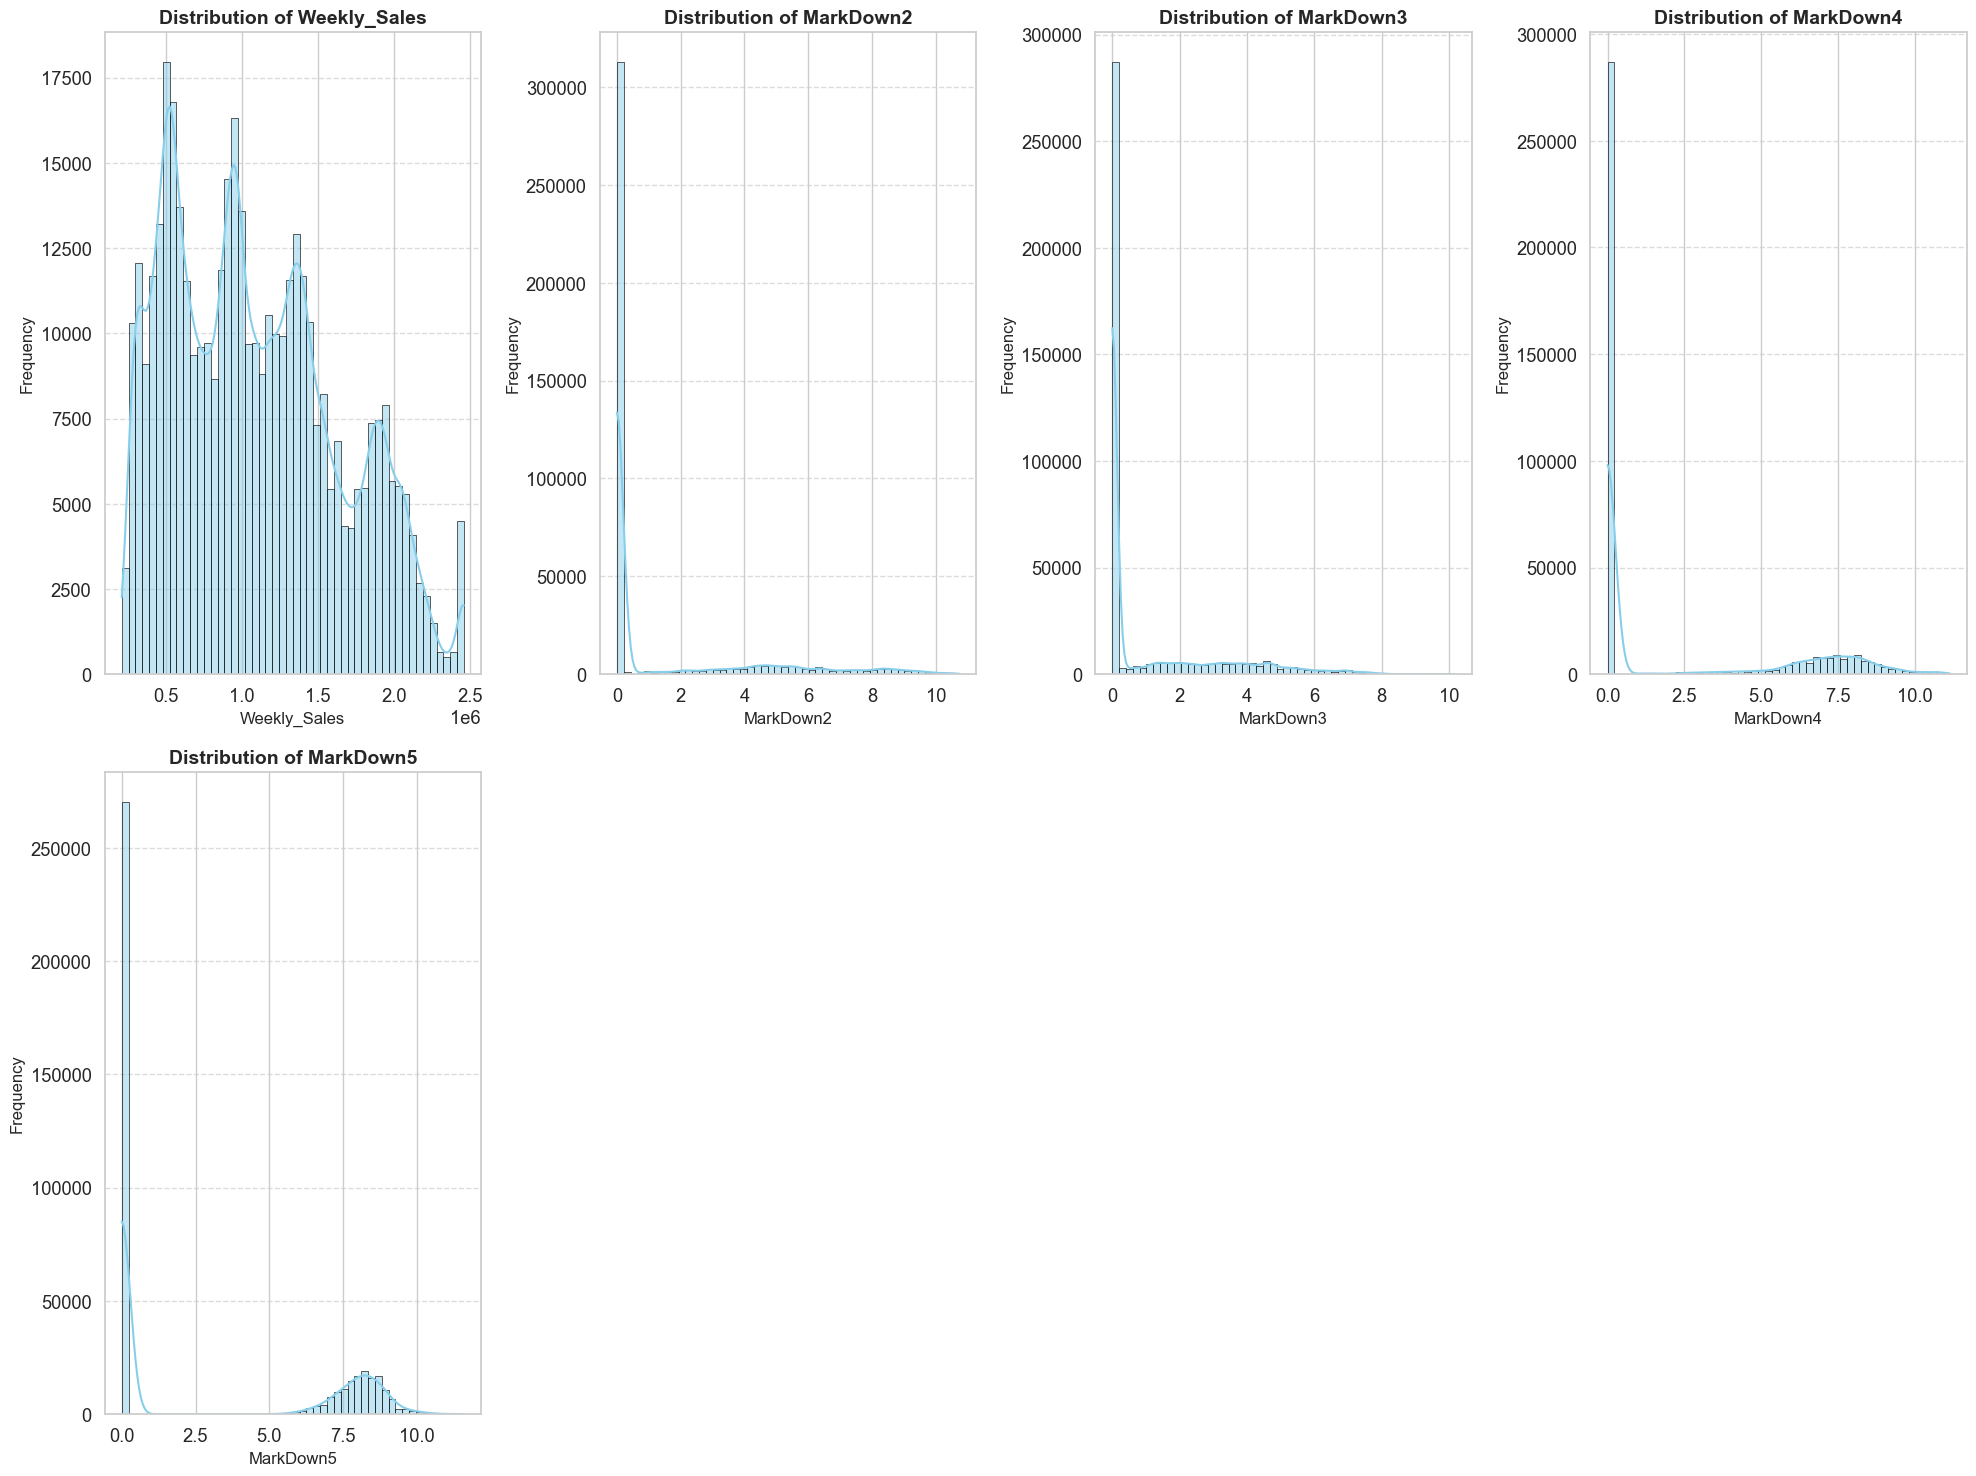

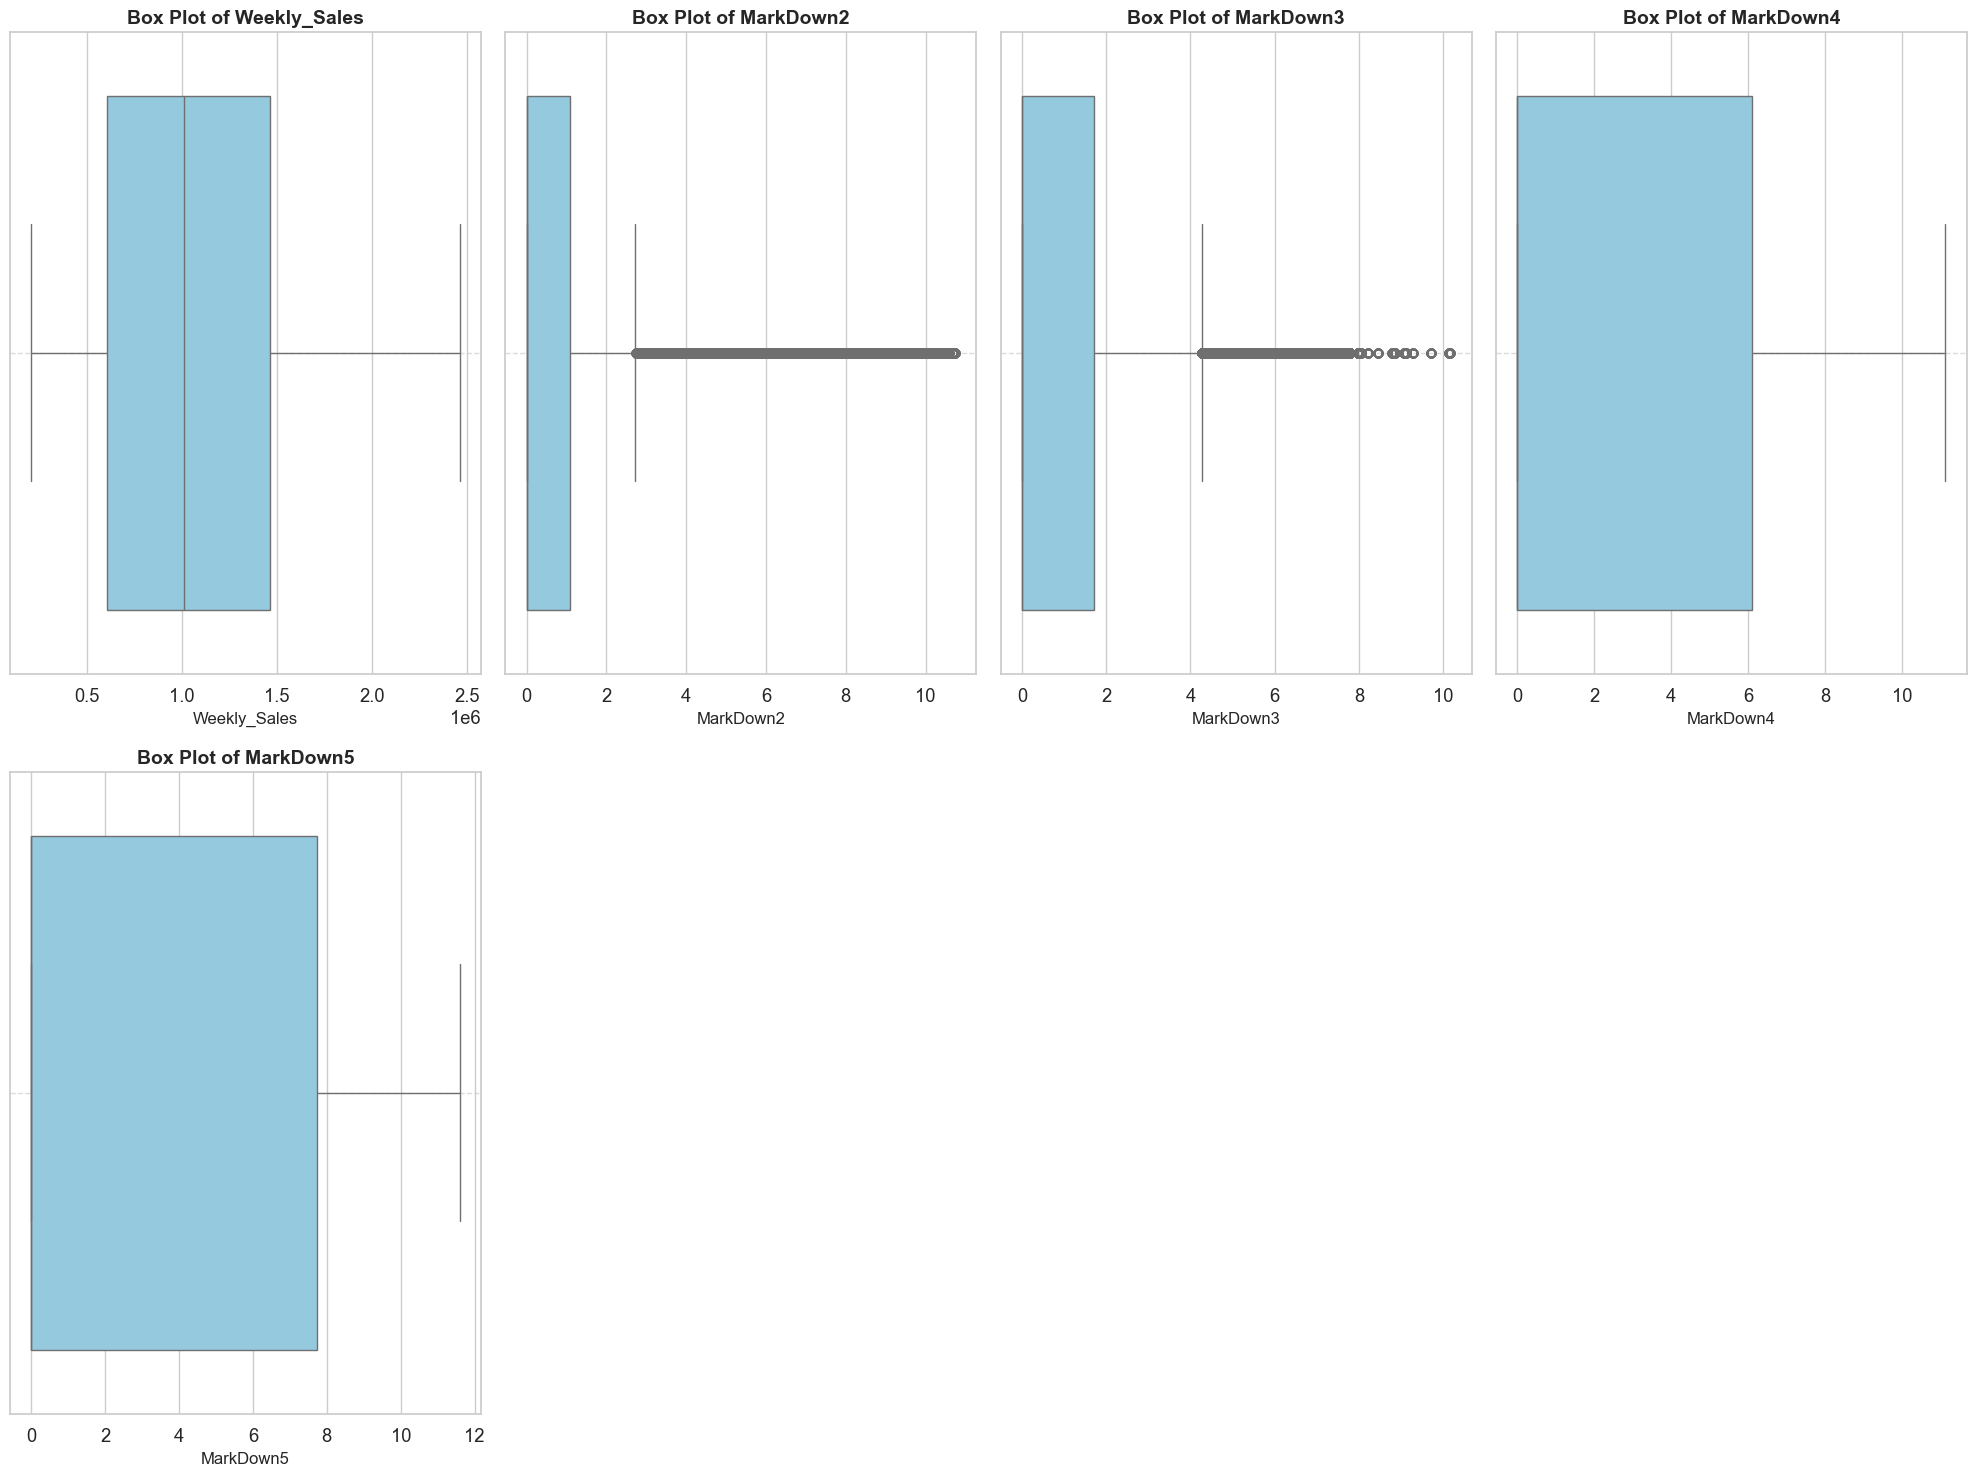

In [39]:
plot_histograms_matrix(data, ['Weekly_Sales', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], bins=50)
plot_boxplots_matrix(data, ['Weekly_Sales', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

# 📌 Outlier Handling Summary

We conducted outlier detection and designed a thoughtful strategy based on domain insight and data distribution. Here's a summary of findings and decisions:

## 🔍 Columns Analyzed

- `Weekly_Sales`  
- `Temperature`  
- `Unemployment`  
- `MarkDown1` to `MarkDown5`  

## 📊 Visualizations Used

To understand the data distribution and outliers, the following plots were generated:

- 📊 **Histograms** — to assess overall distribution and skewness  
- 🧰 **Boxplots** — to detect outliers using IQR method

## 🧠 Outlier Handling Strategy

| Feature         | Outliers | Insight                                                                                   | Decision                       |
|-----------------|----------|-------------------------------------------------------------------------------------------|--------------------------------|
| **Unemployment**| 32,114   | Max (14.31) slightly above upper bound (11.09) but realistic.                             | Keep                           |
| **CPI**         | 0        | No outliers.                                                                              | Keep                           |
| **Fuel_Price**  | 0        | No outliers.                                                                              | Keep                           |
| **Temperature** | 69       | Min (-2.06°F) and max (100.14°F) plausible.                                               | Keep                           |
| **Size**        | 0        | No outliers.                                                                              | Keep                           |
| **Weekly_Sales**| 2,179    | Max (~3.8M) far above IQR upper bound (~2.75M); may reflect real spikes.                  | capping                        |
| **MarkDown1**   | 56,102   | Wide spread, large markdowns plausible.                                                   | Keep                           |
| **MarkDown2**   | 102,274  | Right-skewed, promo-related.                                                              | log-transform                  |
| **MarkDown3**   | 84,986   | Same as MarkDown2.                                                                        | log-transform                  |
| **MarkDown4**   | 78,273   | Large promo spending, not necessarily noise.                                              | log-transform                  |
| **MarkDown5**   | 37,911   | Similar situation — outliers likely meaningful.                                           | log-transform                  |

## ✨ Final Strategy

- ✅ **Keep without modification**:  
  `Unemployment`, `Temperature`, `CPI`, `Fuel_Price`, `Size`, `MarkDown1` 

- 🟡 **Cap or transform**:  
  `Weekly_Sales`, `MarkDown2`, `MarkDown3`, `MarkDown4`, `MarkDown5`  
  *→ Consider using 95th–99th percentile capping or log-scaling*


---

# 🧹Generating Cleaned DataSet

In [40]:
columns_to_drop = ['Date','IsHoliday']
dataset.drop(columns=columns_to_drop, inplace=True)


In [41]:
dataset.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type', 'Size', 'DayOfWeek',
       'IsWeekend', 'Month', 'Year', 'WeekOfYear', 'Quarter', 'Season',
       'IsPromoWeek'],
      dtype='object')

In [ ]:
dataset.to_csv('../walmart_cleaned.csv', index=False)